In [18]:
import cv2
import matplotlib.pyplot as plt

import scipy.signal

import tensorflow as tf
import numpy as np
import time

## Read Image

In [8]:
#
# Load Image
moneyball = cv2.imread('moneyball.jpg')

# Gary Image
moneyball_gray = cv2.cvtColor(moneyball, cv2.COLOR_BGR2GRAY)

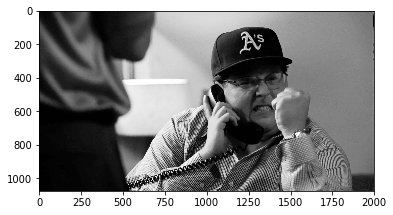

In [11]:

plt.imshow(moneyball_gray, cmap='gray')

## Noisy Image

### 1. Gaussian White Noise

In [30]:
# Introduce Gaussian White Noise
mean = 3
var= 200
sigma = var**0.5

row, col = moneyball_gray.shape
# Gaussian Values
gauss = np.random.normal(mean, sigma, (row, col)).reshape(row, col)

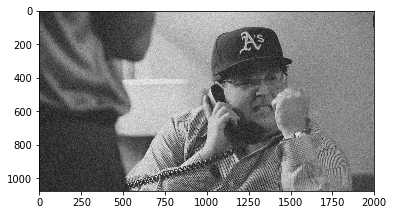

In [31]:
# Noisy Image
moneyball_noisy = moneyball_gray + gauss

plt.imshow(moneyball_noisy, cmap='gray')

### 2. Salt & Pepper Noise

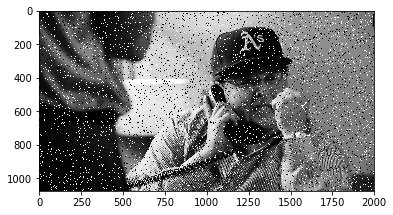

In [49]:
# Generate random integers from 0 to 20

# if value is 0 then Replace image pixel with low value of 0 that corresponds to a black pixel

# if value is 20 then Replace image pixel with a high value of 255 that corresponds to a white pixel

np.random.seed(0)

moneyball_gray_sp = moneyball_gray * 1

sp_indices = np.random.randint(0,21,[row,col])

for i in range(row):
    for j in range(col):
        if sp_indices[i,j] == 0:
            moneyball_gray_sp[i,j] = 0
        if sp_indices[i,j] == 20:
            moneyball_gray_sp[i,j] = 255
plt.imshow(moneyball_gray_sp,cmap='gray')

## Mean Filter
- Reduces the noise in an image
- Averages over it's neighborhood, (white noise of the zero mean will be suppressed)

(<matplotlib.image.AxesImage at 0x7fe766022828>,
 <matplotlib.image.AxesImage at 0x7fe766022b00>)

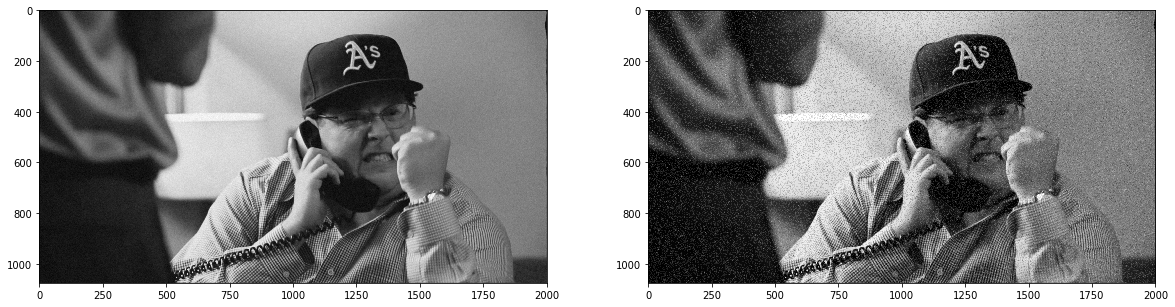

In [55]:
# Mean filter
Hm = np.ones(shape=(3,3))/9

# Apply filter to Gaussian Noise
Gm = scipy.signal.convolve2d(moneyball_noisy,Hm, mode='same')

# Apply Mean Filter to Salt & Pepper Noise
Gm_sp = scipy.signal.convolve2d(moneyball_gray_sp, Hm, mode='same')


# Show image for Gaussian & Salt and Pepper Noisy image After Convolution
fig, axes = plt.subplots(1,2, figsize=(20,20))
axes[0].imshow(Gm, cmap='gray'), axes[1].imshow(Gm_sp, cmap='gray')

__Notice the way a convoluted image using mean filters applied over a noisy image reduces the noise making it clearer__

## Median Filter
- Treat the salt & pepper noise through a Median Filter

(<matplotlib.image.AxesImage at 0x7fe76621c0b8>,
 <matplotlib.image.AxesImage at 0x7fe765f9aac8>)

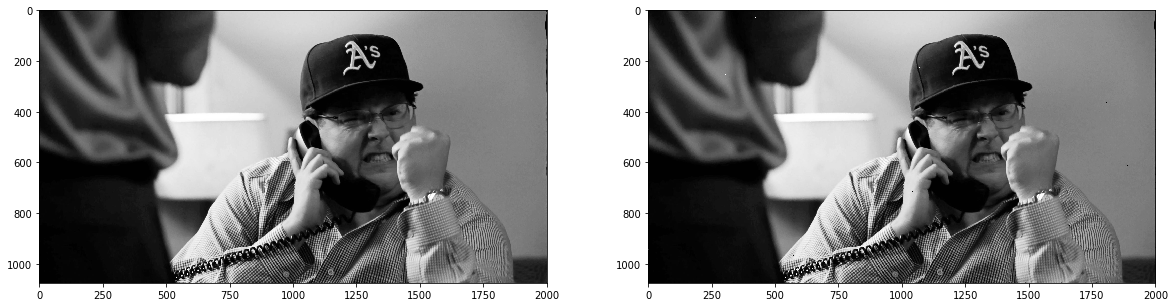

In [57]:
# Median filter

# Gaussian Noise
gray_remove = cv2.medianBlur(moneyball_gray, 3)

# Salt & Pepper Noise
gray_sp_removed = cv2.medianBlur(moneyball_gray_sp,3)

fig, axes = plt.subplots(1,2, figsize=(20,20))

axes[0].imshow(gray_remove,cmap='gray'), axes[1].imshow(gray_sp_removed,cmap='gray')

__Notice the median filter performs well in both pictures with either Gaussian noise or salt-and-pepper noise__

### Gaussian Filter

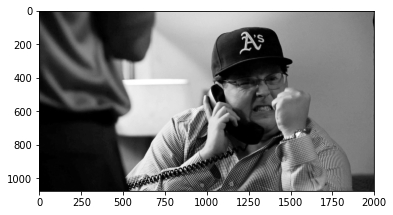

In [60]:
Hg = np.zeros((20,20))

for i in range(20):
    for j in range(20):
        Hg[i, j] = np.exp(-((i-10)**2 + (j-10)**2)/10)

plt.imshow(Hg, cmap='gray')
gray_blur = scipy.signal.convolve2d(moneyball_gray,Hg,mode='same')


plt.imshow(gray_blur,cmap='gray')

#gray_enhanced = moneyball_gray + 0.025*gray_high


#plt.imshow(gray_enhanced,cmap='gray')

### Sobel Edge-Detection Filter

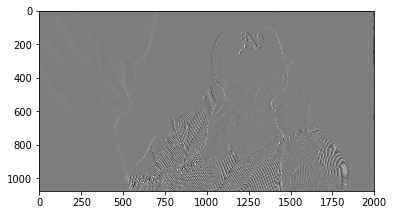

In [63]:
Hx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
Gx = scipy.signal.convolve2d(moneyball_gray, Hx, mode='same')
plt.imshow(Gx,cmap='gray')

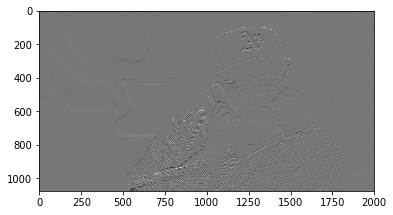

In [64]:
Hy = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
Gy = scipy.signal.convolve2d(moneyball_gray, Hy, mode='same')
plt.imshow(Gy,cmap='gray')

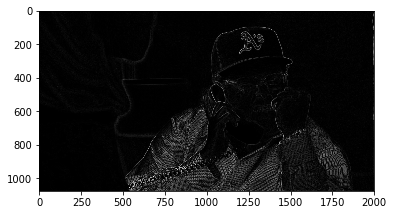

In [66]:
# Output from combind sobel filter
# Pixel intensity function for the combined Sobel filter
G = (Gx*Gx + Gy*Gy)**0.5
plt.imshow(G,cmap='gray')

## Convolution Neural Networks

In [1]:

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

ModuleNotFoundError: No module named 'tensorflow.examples.tutorials'

## CNN Parameters

In [22]:
# Parameters Values
learning_rate = 0.01
epochs =2
batch_size = 256
num_batches = mnist.train.num_examples/batch_size

input_height = 28
input_width = 28

n_classes= 10 # Because we Have 10 digits to predict (0 included)
dropout = 0.75

display_step = 1
filter_height = 5
filter_width=5

depth_in = 1  # Number of channels (1 if only gray else 3 for RGB channels )
depth_out1=64
depth_out2 = 128

### Input/Output definition

In [9]:
# Input
x = tf.placeholder(tf.float32, [None, input_height * input_width])
# Output
y = tf.placeholder(tf.float32, [None, n_classes])

keep_prob = tf.placeholder(tf.float32)

### Weights of Filters

In [10]:
# Number of weights to be learn in first convolutional layer (WC1)
# filter_height*filter_width*depth_in*depth_out1

# Second Convolutional Layer filters weights (WC2)
# filter_height*filter_width*depth_out1*depth_out2

weights = {
'wc1' : tf.Variable(tf.random_normal([filter_height,filter_width,depth_in,depth_out1])),
'wc2' : tf.Variable(tf.random_normal([filter_height,filter_width,depth_out1,depth_out2])),
'wd1' : tf.Variable(tf.random_normal([(int(input_height/4))*(int(input_height/4))* depth_out2,1024])),
'out' : tf.Variable(tf.random_normal([1024,n_classes]))
}
weights

Instructions for updating:
Colocations handled automatically by placer.


{'wc1': <tf.Variable 'Variable:0' shape=(5, 5, 1, 64) dtype=float32_ref>,
 'wc2': <tf.Variable 'Variable_1:0' shape=(5, 5, 64, 128) dtype=float32_ref>,
 'wd1': <tf.Variable 'Variable_2:0' shape=(6272, 1024) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_3:0' shape=(1024, 10) dtype=float32_ref>}

### Biases

In [11]:
biases = {
'bc1' : tf.Variable(tf.random_normal([64])),
'bc2' : tf.Variable(tf.random_normal([128])),
'bd1' : tf.Variable(tf.random_normal([1024])),
'out' : tf.Variable(tf.random_normal([n_classes]))
}

biases

{'bc1': <tf.Variable 'Variable_4:0' shape=(64,) dtype=float32_ref>,
 'bc2': <tf.Variable 'Variable_5:0' shape=(128,) dtype=float32_ref>,
 'bd1': <tf.Variable 'Variable_6:0' shape=(1024,) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_7:0' shape=(10,) dtype=float32_ref>}

### Creating Layers

In [12]:
def conv2d(x,W,b,strides=1):
    """ Convolution Layer """
    x = tf.nn.conv2d(x,W,strides=[1,strides,strides,1],padding='SAME')
    
    # Add bias for each output feature map
    x = tf.nn.bias_add(x,b)
    return tf.nn.relu(x) # add non-linearity to the system


def maxpool2d(x,stride=2):
    """ Max Pooling Layer """
    return tf.nn.max_pool(x,ksize=[1,stride,stride,1],strides=[1,stride,stride,1],padding='SAME')

#### Create Feedforward model

In [13]:

def conv_net(x, weights, biases, dropout):
    """ Feedforward model;
        1st dimension - image index
        2nd dimension - height
        3rd dimension - width
        4th dimension - depth
    """
    
    x = tf.reshape(x,shape=[-1, 28,28,1])
    
    # Convolutional Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = maxpool2d(conv1,2)
    
    ## Convolutional layer 2
    conv2 = conv2d(conv1,weights['wc2'],biases['bc2'])
    conv2 = maxpool2d(conv2,2)
    
    ## Now comes the fully connected layer
    fc1 = tf.reshape(conv2,[-1,weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1,weights['wd1']),biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    
    ## Apply Dropout
    fc1 = tf.nn.dropout(fc1,dropout)
    
    ## Output class prediction
    out = tf.add(tf.matmul(fc1,weights['out']),biases['out'])
    return out

#### Predictions

In [14]:
pred = conv_net(x,weights,biases,keep_prob)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
# Define loss function and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
# Evaluate model
correct_pred = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### Training Phase

In [ ]:
## initializing all variables
init = tf.global_variables_initializer()
####################################################
## Launch the execution Graph
####################################################
start_time = time.time()
with tf.Session() as sess:
    sess.run(init)
    for i in range(epochs):
        for j in range(int(num_batches)):
            batch_x,batch_y = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={x:batch_x,y:batch_y,keep_prob:dropout})
            loss,acc = sess.run([cost,accuracy],feed_dict={x:batch_x,y:batch_y,keep_prob: 1.})
            if epochs % display_step == 0:
                print("Epoch:", '%04d' % (i+1),
                "cost=", "{:.9f}".format(loss),
                "Training accuracy","{:.5f}".format(acc))
            print('Optimization Completed')
            y1 = sess.run(pred,feed_dict={x:mnist.test.images[:256],keep_prob: 1})
            test_classes = np.argmax(y1,1)
            print('Testing Accuracy:',sess.run(accuracy,feed_dict={x:mnist.test.
            images[:256],y:mnist.test.labels[:256],keep_prob: 1}))
            f, a = plt.subplots(1, 10, figsize=(10, 2))
            for i in range(10):
                a[i].imshow(np.reshape(mnist.test.images[i],(28, 28)))
                print(test_classes[i])
                
end_time = time.time()
print('Total processing time:',end_time - start_time)

Epoch: 0001 cost= 277071.718750000 Training accuracy 0.21875
Optimization Completed
Testing Accuracy: 0.19921875
7
3
3
9
9
9
9
9
7
7
Epoch: 0010 cost= 288399.937500000 Training accuracy 0.21875
Optimization Completed
Testing Accuracy: 0.1640625
7
6
6
5
5
5
5
6
5
7
Epoch: 0010 cost= 206906.125000000 Training accuracy 0.29297
Optimization Completed
Testing Accuracy: 0.26953125
7
6
8
7
4
8
4
4
8
7
Epoch: 0010 cost= 115049.671875000 Training accuracy 0.32422
Optimization Completed
Testing Accuracy: 0.27734375
7
6
8
7
4
8
4
4
4
4
Epoch: 0010 cost= 53001.976562500 Training accuracy 0.52344
Optimization Completed
Testing Accuracy: 0.4296875
7
2
8
2
4
8
4
4
4
7
Epoch: 0010 cost= 53154.933593750 Training accuracy 0.39844
Optimization Completed
Testing Accuracy: 0.3203125
7
2
2
0
2
2
4
2
2
7
Epoch: 0010 cost= 32525.671875000 Training accuracy 0.43750
Optimization Completed
Testing Accuracy: 0.359375
7
2
6
0
2
8
9
2
0
0
Epoch: 0010 cost= 28719.404296875 Training accuracy 0.50781
Optimization Comp

/home/fayssal/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Epoch: 0010 cost= 2264.347656250 Training accuracy 0.82812
Optimization Completed
Testing Accuracy: 0.83984375
7
2
1
0
4
1
4
4
5
9
Epoch: 0010 cost= 2225.245361328 Training accuracy 0.80469
Optimization Completed
Testing Accuracy: 0.83984375
7
2
1
0
4
1
4
4
5
9
Epoch: 0010 cost= 1711.364990234 Training accuracy 0.85547
Optimization Completed
Testing Accuracy: 0.859375
7
2
1
0
4
1
4
4
5
9
Epoch: 0010 cost= 1876.968750000 Training accuracy 0.84375
Optimization Completed
Testing Accuracy: 0.84765625
7
2
1
0
4
1
4
4
5
9
Epoch: 0010 cost= 2098.877441406 Training accuracy 0.83203
Optimization Completed
Testing Accuracy: 0.8671875
7
2
1
0
4
1
4
4
5
9
Epoch: 0010 cost= 1625.388671875 Training accuracy 0.84766
Optimization Completed
Testing Accuracy: 0.87109375
7
2
1
0
4
1
4
4
5
9
Epoch: 0010 cost= 1097.710449219 Training accuracy 0.88672
Optimization Completed
Testing Accuracy: 0.87890625
7
2
1
0
4
1
4
4
5
9
Epoch: 0010 cost= 874.269592285 Training accuracy 0.91016
Optimization Completed
Testi

Testing Accuracy: 0.94921875
7
2
1
0
4
1
4
9
5
9
Epoch: 0010 cost= 349.778411865 Training accuracy 0.92188
Optimization Completed
Testing Accuracy: 0.94140625
7
2
1
0
4
1
4
9
5
9
Epoch: 0010 cost= 367.946563721 Training accuracy 0.94922
Optimization Completed
Testing Accuracy: 0.94140625
7
2
1
0
4
1
4
9
5
9
Epoch: 0010 cost= 203.322357178 Training accuracy 0.94922
Optimization Completed
Testing Accuracy: 0.94140625
7
2
1
0
4
1
4
9
5
9
Epoch: 0010 cost= 253.373535156 Training accuracy 0.93359
Optimization Completed
Testing Accuracy: 0.953125
7
2
1
0
4
1
4
9
5
9
Epoch: 0010 cost= 526.792480469 Training accuracy 0.92578
Optimization Completed
Testing Accuracy: 0.95703125
7
2
1
0
4
1
4
9
5
9
Epoch: 0010 cost= 498.913299561 Training accuracy 0.91016
Optimization Completed
Testing Accuracy: 0.95703125
7
2
1
0
4
1
4
9
5
9
Epoch: 0010 cost= 371.629760742 Training accuracy 0.92188
Optimization Completed
Testing Accuracy: 0.9609375
7
2
1
0
4
1
4
9
5
9
Epoch: 0010 cost= 166.524002075 Training acc

Testing Accuracy: 0.96875
7
2
1
0
4
1
4
9
6
9
Epoch: 0010 cost= 200.619110107 Training accuracy 0.96094
Optimization Completed
Testing Accuracy: 0.96875
7
2
1
0
4
1
4
9
6
9
Epoch: 0010 cost= 148.301818848 Training accuracy 0.96094
Optimization Completed
Testing Accuracy: 0.96875
7
2
1
0
4
1
4
9
5
9
Epoch: 0010 cost= 116.662101746 Training accuracy 0.96875
Optimization Completed
Testing Accuracy: 0.9609375
7
2
1
0
4
1
4
9
6
9
Epoch: 0010 cost= 60.627796173 Training accuracy 0.98438
Optimization Completed
Testing Accuracy: 0.96484375
7
2
1
0
4
1
4
9
6
9
Epoch: 0010 cost= 223.655395508 Training accuracy 0.94922
Optimization Completed
Testing Accuracy: 0.96484375
7
2
1
0
4
1
4
9
6
9
Epoch: 0010 cost= 152.604660034 Training accuracy 0.96094
Optimization Completed
Testing Accuracy: 0.96484375
7
2
1
0
4
1
4
9
6
9
Epoch: 0010 cost= 213.120330811 Training accuracy 0.95703
Optimization Completed
Testing Accuracy: 0.96484375
7
2
1
0
4
1
4
9
6
9
Epoch: 0010 cost= 111.217315674 Training accuracy 0.

Testing Accuracy: 0.98828125
7
2
1
0
4
1
4
9
5
9
Epoch: 0010 cost= 68.061805725 Training accuracy 0.97266
Optimization Completed
Testing Accuracy: 0.98828125
7
2
1
0
4
1
4
9
5
9
Epoch: 0002 cost= 128.224945068 Training accuracy 0.96484
Optimization Completed
Testing Accuracy: 0.984375
7
2
1
0
4
1
4
9
5
9
Epoch: 0010 cost= 118.237907410 Training accuracy 0.96484
Optimization Completed
Testing Accuracy: 0.984375
7
2
1
0
4
1
4
9
5
9
Epoch: 0010 cost= 202.668411255 Training accuracy 0.95312
Optimization Completed
Testing Accuracy: 0.98046875
7
2
1
0
4
1
4
9
5
9
Epoch: 0010 cost= 27.788339615 Training accuracy 0.97656
Optimization Completed
Testing Accuracy: 0.98046875
7
2
1
0
4
1
4
9
5
9
Epoch: 0010 cost= 66.111328125 Training accuracy 0.98047
Optimization Completed
Testing Accuracy: 0.98046875
7
2
1
0
4
1
4
9
5
9
Epoch: 0010 cost= 63.995834351 Training accuracy 0.98047
Optimization Completed
Testing Accuracy: 0.98046875
7
2
1
0
4
1
4
9
5
9
Epoch: 0010 cost= 32.985385895 Training accuracy 

Testing Accuracy: 0.98828125
7
2
1
0
4
1
4
9
5
9
Epoch: 0010 cost= 117.425872803 Training accuracy 0.95703
Optimization Completed
Testing Accuracy: 0.9921875
7
2
1
0
4
1
4
9
5
9
Epoch: 0010 cost= 115.835342407 Training accuracy 0.96484
Optimization Completed
Testing Accuracy: 0.98828125
7
2
1
0
4
1
4
9
5
9
Epoch: 0010 cost= 41.876350403 Training accuracy 0.98438
Optimization Completed
Testing Accuracy: 0.98828125
7
2
1
0
4
1
4
9
5
9
Epoch: 0010 cost= 69.474082947 Training accuracy 0.97266
Optimization Completed
Testing Accuracy: 0.98828125
7
2
1
0
4
1
4
9
5
9
Epoch: 0010 cost= 25.456417084 Training accuracy 0.98438
Optimization Completed
Testing Accuracy: 0.984375
7
2
1
0
4
1
4
9
5
9
Epoch: 0010 cost= 151.542373657 Training accuracy 0.95703
Optimization Completed
Testing Accuracy: 0.98828125
7
2
1
0
4
1
4
9
5
9
Epoch: 0010 cost= 75.026252747 Training accuracy 0.96094
Optimization Completed
Testing Accuracy: 0.98828125
7
2
1
0
4
1
4
9
5
9
Epoch: 0010 cost= 8.409088135 Training accuracy 

Testing Accuracy: 0.984375
7
2
1
0
4
1
4
9
5
9
Epoch: 0010 cost= 130.158142090 Training accuracy 0.95703
Optimization Completed
Testing Accuracy: 0.984375
7
2
1
0
4
1
4
9
5
9
Epoch: 0010 cost= 121.582366943 Training accuracy 0.97656
Optimization Completed
Testing Accuracy: 0.98828125
7
2
1
0
4
1
4
9
5
9
Epoch: 0010 cost= 14.603052139 Training accuracy 0.98438
Optimization Completed
Testing Accuracy: 0.98828125
7
2
1
0
4
1
4
9
5
9
Epoch: 0010 cost= 60.575115204 Training accuracy 0.97266
Optimization Completed
Testing Accuracy: 0.9921875
7
2
1
0
4
1
4
9
5
9
Epoch: 0010 cost= 71.823478699 Training accuracy 0.97266
Optimization Completed
Testing Accuracy: 0.9921875
7
2
1
0
4
1
4
9
5
9
Epoch: 0010 cost= 0.000000000 Training accuracy 1.00000
Optimization Completed
Testing Accuracy: 0.9921875
7
2
1
0
4
1
4
9
5
9
Epoch: 0010 cost= 86.989807129 Training accuracy 0.96484
Optimization Completed
Testing Accuracy: 0.98828125
7
2
1
0
4
1
4
9
5
9
Epoch: 0010 cost= 81.228118896 Training accuracy 0.980

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fe45fa1a488> (for post_execute):


ValueError: object too deep for desired array

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
